In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [43]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [45]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [47]:
data=pd.DataFrame(df)

In [49]:
data

,x1,x2,y
0,1.036313,-0.780383,1
1,-0.936595,1.185618,0
2,1.164227,-0.671142,1
3,-0.135193,0.803227,0
4,1.366085,-0.316941,1
...,...,...,...
995,-0.238459,1.025559,0
996,-0.147780,1.206905,0
997,0.400184,-0.099129,1
998,1.460144,-0.095313,1


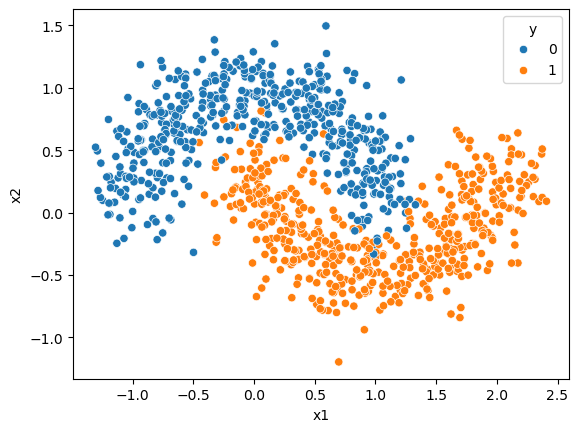

In [51]:
sns.scatterplot(x="x1",y="x2",hue="y",data=data)
plt.show()

In [54]:
x_a=data.iloc[:,:-1]

In [56]:
x_a

,x1,x2
0,1.036313,-0.780383
1,-0.936595,1.185618
2,1.164227,-0.671142
3,-0.135193,0.803227
4,1.366085,-0.316941
...,...,...
995,-0.238459,1.025559
996,-0.147780,1.206905
997,0.400184,-0.099129
998,1.460144,-0.095313


In [58]:
y_a=data["y"]
y_a

0      1
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    1
998    1
999    0
Name: y, Length: 1000, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,random_state=42,test_size=0.2

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [70]:
from sklearn.naive_bayes import GaussianNB

In [74]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dt.score(x_test,y_test)*100, dt.score(x_train,y_train)*100

(96.0, 100.0)

In [84]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [86]:
svc.score(x_test,y_test)*100, svc.score(x_train,y_train)*100

(97.0, 96.5)

In [88]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [90]:
nb.score(x_train,y_train)*100, nb.score(x_test,y_test)*100

(86.875, 86.5)

In [97]:
from sklearn.ensemble import VotingClassifier #VotingRegressor

In [101]:
li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [128]:
vc=VotingClassifier(li,weights=[6,5,7]) #VotingRegressor

In [130]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[6, 5, 7])

In [132]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(97.125, 97.5)

In [140]:
prd={"dt":dt.predict(x_test),"svm":svc.predict(x_test),"gnb":nb.predict(x_test),"vc":vc.predict(x_test)}

In [142]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,1,1,0,1
196,0,0,1,0
197,1,0,0,0
198,0,0,0,0
